In [ ]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
batch_size = 128
seq_len = 128

d_k = 64
d_v = 64
h = 8
d_ff = 2048

In [ ]:
from google.colab import files
files.upload()

Saving Hanyang_Securities_F.csv to Hanyang_Securities_F (1).csv


{'Hanyang_Securities_F.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\r\n2000-01-04,6300,7100,6300,7000,1619.266357,56800\r\n2000-01-05,6700,7100,6610,6700,1549.868774,52100\r\n2000-01-06,7000,7000,6250,6300,1457.339844,64900\r\n2000-01-07,6350,6600,6300,6370,1473.532349,61800\r\n2000-01-10,6610,6700,6300,6500,1503.603882,56100\r\n2000-01-11,6300,6550,6250,6310,1459.652832,41900\r\n2000-01-12,6300,6410,6110,6110,1413.387939,30400\r\n2000-01-13,6270,6270,6100,6250,1445.773193,56800\r\n2000-01-14,6300,6400,5920,5920,1369.436401,25500\r\n2000-01-17,6000,6200,5900,5950,1376.376221,34700\r\n2000-01-18,6150,6150,5600,5700,1318.545166,26500\r\n2000-01-19,5690,5690,5100,5160,1193.630493,66600\r\n2000-01-20,5000,5250,4910,5100,1179.750977,55500\r\n2000-01-21,5110,5340,4900,5020,1161.245117,46100\r\n2000-01-24,4900,5200,4900,5010,1158.931885,30900\r\n2000-01-25,5000,5200,5000,5060,1170.498291,58200\r\n2000-01-26,5200,5700,5070,5300,1226.015747,102300\r\n2000-01-27,5490,6090,5300,6080,1406.447

In [ ]:
pip install simpy.io

In [ ]:
import io
import pandas as pd

In [ ]:
data = pd.read_csv(io.BytesIO(files['Hanyang_Securities_F.csv']))
data.head()

TypeError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

stock = pd.read_csv('/content/Hanyang_Securities_F.csv', sep=',')
df = stock.dropna()

df['Volume'].replace(to_replace=0, method='ffill', inplace=True) 
df.sort_values('Date', inplace=True)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5181,2021-02-01,9200,9480,9100,9380,9380.0,81355
5182,2021-02-02,9460,9810,9460,9700,9700.0,105755
5183,2021-02-03,9850,10200,9800,9990,9990.0,170966
5184,2021-02-04,10100,10200,9940,10150,10150.0,133504
5185,2021-02-05,10200,10800,10150,10650,10650.0,247224


In [ ]:
ratio = df['Adj Close']/df['Close']
ratio

0       0.231324
1       0.231324
2       0.231324
3       0.231324
4       0.231324
          ...   
5181    1.000000
5182    1.000000
5183    1.000000
5184    1.000000
5185    1.000000
Length: 5186, dtype: float64

In [ ]:
df['Adj Open'] = df['Open']*ratio
df['Adj High'] = df['High']*ratio
df['Adj Low'] = df['Low']*ratio

In [ ]:
df.drop(['Open','High','Low','Close'], axis=1, inplace=True)

df

,Date,Adj Close,Volume,Adj Open,Adj High,Adj Low
0,2000-01-04,1619.266357,56800,1457.339721,1642.398734,1457.339721
1,2000-01-05,1549.868774,52100,1549.868774,1642.398253,1529.049641
2,2000-01-06,1457.339844,64900,1619.266493,1619.266493,1445.773655
3,2000-01-07,1473.532349,61800,1468.905874,1526.736814,1457.339686
4,2000-01-10,1503.603882,56100,1529.049486,1549.868617,1457.339147
...,...,...,...,...,...,...
5181,2021-02-01,9380.000000,81355,9200.000000,9480.000000,9100.000000
5182,2021-02-02,9700.000000,105755,9460.000000,9810.000000,9460.000000
5183,2021-02-03,9990.000000,170966,9850.000000,10200.000000,9800.000000
5184,2021-02-04,10150.000000,133504,10100.000000,10200.000000,9940.000000


In [ ]:
df.rename(columns={'Date':'Date','Adj Open':'Open', 'Adj High':'High', 'Adj Low':'Low', 'Adj Close':'Close'}, inplace=True)

In [ ]:
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

df.head()

,Date,Open,High,Low,Close,Volume
0,2000-01-04,1457.339721,1642.398734,1457.339721,1619.266357,56800
1,2000-01-05,1549.868774,1642.398253,1529.049641,1549.868774,52100
2,2000-01-06,1619.266493,1619.266493,1445.773655,1457.339844,64900
3,2000-01-07,1468.905874,1526.736814,1457.339686,1473.532349,61800
4,2000-01-10,1529.049486,1549.868617,1457.339147,1503.603882,56100


In [ ]:
df.index.values

array([   0,    1,    2, ..., 5183, 5184, 5185])

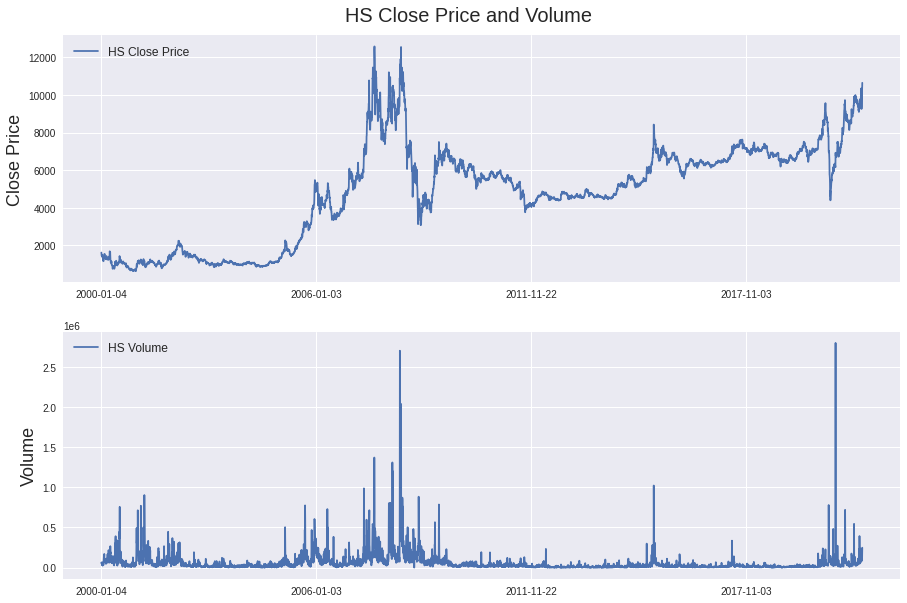

In [ ]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("HS Close Price and Volume", fontsize=20)
st.set_y(0.92)

ax1 = fig.add_subplot(211)
ax1.plot(df['Close'], label='HS Close Price')
ax1.set_xticks(range(0, df.shape[0], 1464))
ax1.set_xticklabels(df['Date'].loc[::1464])
ax1.set_ylabel('Close Price', fontsize=18)
ax1.legend(loc="upper left", fontsize=12)

ax2 = fig.add_subplot(212)
ax2.plot(df['Volume'], label='HS Volume')
ax2.set_xticks(range(0, df.shape[0], 1464))
ax2.set_xticklabels(df['Date'].loc[::1464])
ax2.set_ylabel('Volume', fontsize=18)
ax2.legend(loc="upper left", fontsize=12)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2000-01-04,1457.339721,1642.398734,1457.339721,1619.266357,56800
1,2000-01-05,1549.868774,1642.398253,1529.049641,1549.868774,52100
2,2000-01-06,1619.266493,1619.266493,1445.773655,1457.339844,64900
3,2000-01-07,1468.905874,1526.736814,1457.339686,1473.532349,61800
4,2000-01-10,1529.049486,1549.868617,1457.339147,1503.603882,56100


In [ ]:
scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df_scaled = scaler.fit_transform(df[scale_cols])

# 정규화가 완료된 데이터들은 pandas dataframe으로 변환합니다
# pandas는 시계열 자료에 대한 다양한 기능을 제공하여 LSTM에서 사용하는 window를 만들때 유용합니다

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

          Open      High       Low     Close    Volume
0     0.069093  0.078420  0.072692  0.082280  0.020301
1     0.076891  0.078420  0.078924  0.076473  0.018620
2     0.082740  0.076587  0.071686  0.068730  0.023197
3     0.070068  0.069256  0.072692  0.070085  0.022088
4     0.075136  0.071089  0.072692  0.072601  0.020050
...        ...       ...       ...       ...       ...
5181  0.721622  0.699387  0.736878  0.731697  0.029080
5182  0.743534  0.725532  0.768164  0.758474  0.037804
5183  0.776402  0.756432  0.797711  0.782742  0.061119
5184  0.797472  0.756432  0.809878  0.796130  0.047725
5185  0.805899  0.803969  0.828128  0.837970  0.088383

[5186 rows x 5 columns]


In [ ]:
df_scaled.describe()

,Open,High,Low,Close,Volume
count,5186.000000,5186.000000,5186.000000,5186.000000,5186.000000
mean,0.353266,0.336558,0.359212,0.350731,0.021491
std,0.216670,0.207100,0.219397,0.214807,0.043042
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112288,0.107498,0.113192,0.111441,0.003833
50%,0.388059,0.367230,0.394341,0.384704,0.009001
75%,0.504751,0.478909,0.514688,0.500902,0.022008
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
times = sorted(df_scaled.index.values)
last_20pct = sorted(df_scaled.index.values)[-int(0.2*len(times))] 
last_40pct = sorted(df_scaled.index.values)[-int(0.4*len(times))] 

In [ ]:
df_train = df_scaled[(df_scaled.index < last_40pct)]  # Training data are 80% of total data
df_valid = df_scaled[(df_scaled.index >= last_40pct) & (df_scaled.index < last_20pct)]
df_test = df_scaled[(df_scaled.index >= last_20pct)]

# print proportions
print('train: {}% | validation: {}% | test {}%'.format(round(len(df_train)/len(df_scaled),2),
                                                       round(len(df_valid)/len(df_scaled),2),
                                                       round(len(df_test)/len(df_scaled),2)))

train: 0.6% | validation: 0.2% | test 0.2%


In [ ]:
train_data = df_train.values
valid_data = df_valid.values
test_data = df_test.values
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(valid_data.shape))
print('Test data shape: {}'.format(test_data.shape))

df_train.head()

Training data shape: (3112, 5)
Validation data shape: (1037, 5)
Test data shape: (1037, 5)


,Open,High,Low,Close,Volume
0,0.069093,0.078420,0.072692,0.082280,0.020301
1,0.076891,0.078420,0.078924,0.076473,0.018620
2,0.082740,0.076587,0.071686,0.068730,0.023197
3,0.070068,0.069256,0.072692,0.070085,0.022088
4,0.075136,0.071089,0.072692,0.072601,0.020050


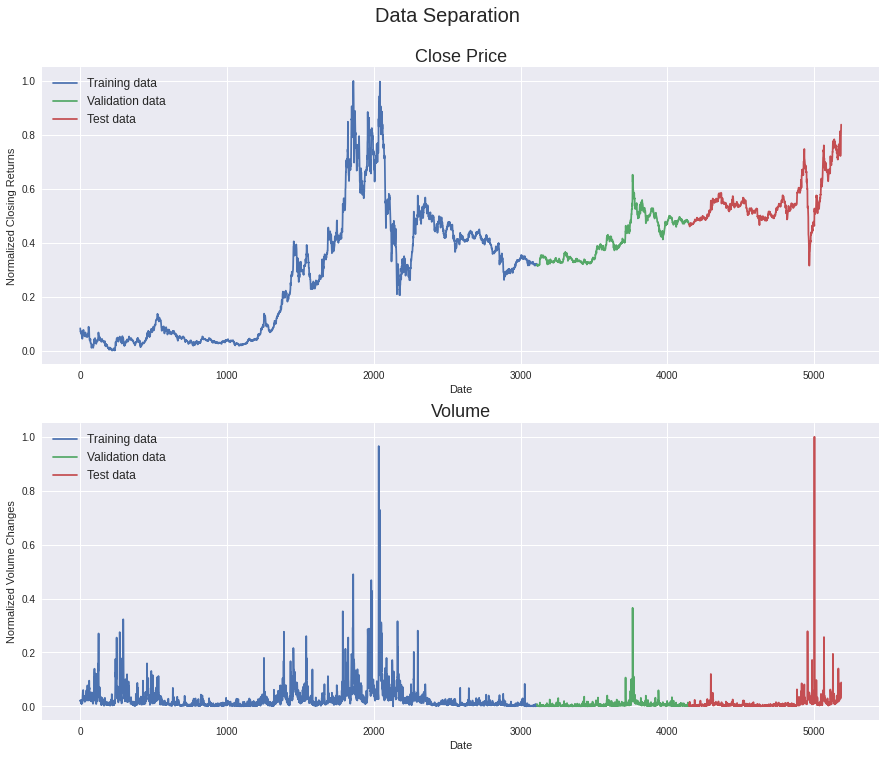

In [ ]:
fig = plt.figure(figsize=(15,12))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.95)

###############################################################################

ax1 = fig.add_subplot(211)
ax1.plot(np.arange(train_data.shape[0]), df_train['Close'], label='Training data')

ax1.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+valid_data.shape[0]), df_valid['Close'], label='Validation data')

ax1.plot(np.arange(train_data.shape[0]+valid_data.shape[0], 
                   train_data.shape[0]+valid_data.shape[0]+test_data.shape[0]), df_test['Close'], label='Test data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Returns')
ax1.set_title("Close Price", fontsize=18)
ax1.legend(loc="best", fontsize=12)

###############################################################################

ax2 = fig.add_subplot(212)
ax2.plot(np.arange(train_data.shape[0]), df_train['Volume'], label='Training data')

ax2.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+valid_data.shape[0]), df_valid['Volume'], label='Validation data')

ax2.plot(np.arange(train_data.shape[0]+valid_data.shape[0], 
                   train_data.shape[0]+valid_data.shape[0]+test_data.shape[0]), df_test['Volume'], label='Test data')
ax2.set_xlabel('Date')
ax2.set_ylabel('Normalized Volume Changes')
ax2.set_title("Volume", fontsize=18)
ax2.legend(loc="best", fontsize=12)

In [ ]:
# Training data
x_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  x_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
  y_train.append(train_data[:, 3][i]) #Value of 4th column (Close Price) of df-row 128+1
x_train, y_train = np.array(x_train), np.array(y_train)

###############################################################################

# Validation data
x_valid, y_valid = [], []
for i in range(seq_len, len(valid_data)):
    x_valid.append(valid_data[i-seq_len:i])
    y_valid.append(valid_data[:, 3][i])
x_valid, y_valid = np.array(x_valid), np.array(y_valid)

###############################################################################

# Test data
x_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    x_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 3][i])    
x_test, y_test = np.array(x_test), np.array(y_test)

print('Training set shape', x_train.shape, y_train.shape)
print('Validation set shape', x_valid.shape, y_valid.shape)
print('Testing set shape' ,x_test.shape, y_test.shape)

Training set shape (2984, 128, 5) (2984,)
Validation set shape (909, 128, 5) (909,)
Testing set shape (909, 128, 5) (909,)


In [ ]:
class Time2Vector(Layer):
  def __init__(self, seq_len, **kwargs):
    super(Time2Vector, self).__init__()
    self.seq_len = seq_len

  def build(self, input_shape):
    '''Initialize weights and biases with shape (batch, seq_len)'''
    self.weights_linear = self.add_weight(name='weight_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.bias_linear = self.add_weight(name='bias_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.weights_periodic = self.add_weight(name='weight_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

    self.bias_periodic = self.add_weight(name='bias_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

  def call(self, x):
    '''Calculate linear and periodic time features'''
    x = tf.math.reduce_mean(x[:,:,:4], axis=-1) 
    time_linear = self.weights_linear * x + self.bias_linear # Linear time feature
    time_linear = tf.expand_dims(time_linear, axis=-1) # Add dimension (batch, seq_len, 1)
    
    time_periodic = tf.math.sin(tf.multiply(x, self.weights_periodic) + self.bias_periodic)
    time_periodic = tf.expand_dims(time_periodic, axis=-1) # Add dimension (batch, seq_len, 1)
    return tf.concat([time_linear, time_periodic], axis=-1) # shape = (batch, seq_len, 2)
   
  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'seq_len': self.seq_len})
    return config

In [ ]:
class Scaled_Dot_Product_Attention(Layer):
  def __init__(self, d_k, d_v):
    super(Scaled_Dot_Product_Attention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v

  def build(self, input_shape):
    self.query = Dense(self.d_k, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')
    
    self.key = Dense(self.d_k, 
                     input_shape=input_shape, 
                     kernel_initializer='glorot_uniform', 
                     bias_initializer='glorot_uniform')
    
    self.value = Dense(self.d_v, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')

  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    q = self.query(inputs[0])
    k = self.key(inputs[1])

    attn_weights = tf.matmul(q, k, transpose_b=True)
    attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
    attn_weights = tf.nn.softmax(attn_weights, axis=-1)
    
    v = self.value(inputs[2])
    attn_out = tf.matmul(attn_weights, v)
    return attn_out    

#############################################################################

class Multi_Head_Attention(Layer):
  def __init__(self, d_k, d_v, h):
    super(Multi_Head_Attention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.h = h
    self.attn_heads = list()

  def build(self, input_shape):
    for n in range(self.h):
      self.attn_heads.append(Scaled_Dot_Product_Attention(self.d_k, self.d_v))  
    
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1]=7 
    self.linear = Dense(input_shape[0][-1], 
                        input_shape=input_shape, 
                        kernel_initializer='glorot_uniform', 
                        bias_initializer='glorot_uniform')

  def call(self, inputs):
    attn = [self.attn_heads[i](inputs) for i in range(self.h)]
    concat_attn = tf.concat(attn, axis=-1)
    multi_linear = self.linear(concat_attn)
    return multi_linear   

#############################################################################

class TransformerEncoder(Layer):
  def __init__(self, d_k, d_v, h, d_ff, dropout=0.1, **kwargs):
    super(TransformerEncoder, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.h = h
    self.d_ff = d_ff
    self.attn_heads = list()
    self.dropout_rate = dropout

  def build(self, input_shape):
    self.attn_multi = Multi_Head_Attention(self.d_k, self.d_v, self.h)
    self.attn_dropout = Dropout(self.dropout_rate)
    self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)

    self.ff_conv1D_1 = Conv1D(filters=self.d_ff, kernel_size=1, activation='relu')
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1] = 7 
    self.ff_conv1D_2 = Conv1D(filters=input_shape[0][-1], kernel_size=1) 
    self.ff_dropout = Dropout(self.dropout_rate)
    self.ff_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)    
  
  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    attn_layer = self.attn_multi(inputs)
    attn_layer = self.attn_dropout(attn_layer)
    attn_layer = self.attn_normalize(inputs[0] + attn_layer)

    ff_layer = self.ff_conv1D_1(attn_layer)
    ff_layer = self.ff_conv1D_2(ff_layer)
    ff_layer = self.ff_dropout(ff_layer)
    ff_layer = self.ff_normalize(inputs[0] + ff_layer)
    return ff_layer 

  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'d_k': self.d_k,
                   'd_v': self.d_v,
                   'h': self.h,
                   'd_ff': self.d_ff,
                   'attn_heads': self.attn_heads,
                   'dropout_rate': self.dropout_rate})
    return config

In [ ]:
# val_loss가 10회 같을 시 early_stop, batch_size(=K)는 K문제 풀고 답보고 하는 식
# 위에서 모델을 구성한 후 compile 메서드를 호출하여 학습과정을 설정합니다
# optimizer : 훈련 과정을 설정한다
# loss : 최적화 과정에서 최소화될 손실 함수(loss function)을 설정합니다
# metrics : 훈련을 모니터링하기 위해 사용됩니다
# validation_data = 검증 데이터를 사용합니다. 각 에포크마다 정확도도 함께 출력됩니다
# 이 정확도는 훈련이 잘 되고 있는지를 보여줄 뿐이며 실제로 모델이 검증데이터를 학습하지는 않습니다
# 검증 데이터의 loss가 낮아지다가 높아지기 시작하면 overfitting의 신호입니다
# verbose / 0 : 출력 없음 / 1 : 훈련 진행도 보여주는 진행 막대 보여줌 / 2 : 미니 배치마다 손실 정보 출력

from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

def MPE(y_true, y_pred): 
    return K.mean((y_true - y_pred) / y_true) * 100
    
def MSLE(y_true, y_pred):
    return K.mean(K.square(K.log(y_true+1) - K.log(y_pred+1)), axis=-1)

def RMSLE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(K.log(y_true+1) - K.log(y_pred+1)), axis=-1))

def R2(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return ( 1 - SS_res/(SS_tot + K.epsilon()))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
from keras.optimizers import Adam




def create_model():
  '''Initialize time and transformer layers'''
  time_embedding = Time2Vector(seq_len)
  attn_layer1 = TransformerEncoder(d_k, d_v, h, d_ff)
  attn_layer2 = TransformerEncoder(d_k, d_v, h, d_ff)
  attn_layer3 = TransformerEncoder(d_k, d_v, h, d_ff)
  attn_layer4 = TransformerEncoder(d_k, d_v, h, d_ff)
  attn_layer5 = TransformerEncoder(d_k, d_v, h, d_ff)
  attn_layer6 = TransformerEncoder(d_k, d_v, h, d_ff)

  '''Construct model'''
  in_seq = Input(shape=(seq_len, 5))
  x = time_embedding(in_seq)
  x = Concatenate(axis=-1)([in_seq, x])
  x = attn_layer1((x, x, x))
  x = attn_layer2((x, x, x))
  x = attn_layer3((x, x, x))
  x = attn_layer4((x, x, x))
  x = attn_layer5((x, x, x))
  x = attn_layer6((x, x, x))
  x = GlobalAveragePooling1D(data_format='channels_first')(x)
  x = Dropout(0.1)(x)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.1)(x)
  out = Dense(1, activation='linear')(x)



  model = Model(inputs=in_seq, outputs=out)
  model.compile(loss = RMSE, optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999), metrics=[soft_acc, 'mse', 'mae', RMSE, 'mape', MPE, MSLE, RMSLE, R2])
  return model


model = create_model()
model.summary()
filename = os.path.join('tmp', 'checkpointer.ckpt')

callback = tf.keras.callbacks.ModelCheckpoint(filename, 
                                              monitor='val_loss', 
                                              save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=200, 
                    callbacks=[callback, early_stop],
                    validation_data=(x_valid, y_valid))  



###############################################################################
'''Calculate predictions and metrics'''

#Calculate predication for training, validation and test data
train_pred = model.predict(x_train)
valid_pred = model.predict(x_valid)
test_pred = model.predict(x_test)

#Print evaluation metrics for all datasets
train_evaluate = model.evaluate(x_train, y_train, verbose=0)
valid_evaluate = model.evaluate(x_valid, y_valid, verbose=0)
test_evaluate = model.evaluate(x_test, y_test, verbose=0)



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 5)]     0                                            
__________________________________________________________________________________________________
time2_vector (Time2Vector)      (None, 128, 2)       512         input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 128, 7)       0           input_1[0][0]                    
                                                                 time2_vector[0][0]               
__________________________________________________________________________________________________
transformer_encoder (Transforme (None, 128, 7)       46634       concatenate[0][0]            

INFO:tensorflow:Assets written to: tmp/checkpointer.ckpt/assets


INFO:tensorflow:Assets written to: tmp/checkpointer.ckpt/assets


Epoch 2/200
24/24 [==============================] - 48s 2s/step - loss: 0.1058 - soft_acc: 0.8574 - mse: 0.0114 - mae: 0.0746 - RMSE: 0.1058 - mape: 31715.6202 - MPE: -inf - MSLE: 0.0054 - RMSLE: 0.0549 - R2: 0.7790 - val_loss: 0.0416 - val_soft_acc: 0.8662 - val_mse: 0.0024 - val_mae: 0.0361 - val_RMSE: 0.0387 - val_mape: 8.1611 - val_MPE: 2.3471 - val_MSLE: 0.0011 - val_RMSLE: 0.0251 - val_R2: -3.9547

Epoch 00002: val_loss improved from 0.08609 to 0.04159, saving model to tmp/checkpointer.ckpt


INFO:tensorflow:Assets written to: tmp/checkpointer.ckpt/assets


INFO:tensorflow:Assets written to: tmp/checkpointer.ckpt/assets


Epoch 3/200
24/24 [==============================] - 48s 2s/step - loss: 0.0892 - soft_acc: 0.9041 - mse: 0.0081 - mae: 0.0558 - RMSE: 0.0892 - mape: 3354.1715 - MPE: -inf - MSLE: 0.0037 - RMSLE: 0.0404 - R2: 0.8412 - val_loss: 0.0812 - val_soft_acc: 0.6270 - val_mse: 0.0070 - val_mae: 0.0780 - val_RMSE: 0.0819 - val_mape: 19.2592 - val_MPE: -18.6718 - val_MSLE: 0.0033 - val_RMSLE: 0.0535 - val_R2: -100.5269

Epoch 00003: val_loss did not improve from 0.04159
Epoch 4/200
24/24 [==============================] - 48s 2s/step - loss: 0.0868 - soft_acc: 0.9058 - mse: 0.0076 - mae: 0.0573 - RMSE: 0.0868 - mape: 22672.5093 - MPE: -inf - MSLE: 0.0035 - RMSLE: 0.0413 - R2: 0.8433 - val_loss: 0.0551 - val_soft_acc: 0.6094 - val_mse: 0.0034 - val_mae: 0.0509 - val_RMSE: 0.0531 - val_mape: 13.1411 - val_MPE: -11.5203 - val_MSLE: 0.0017 - val_RMSLE: 0.0357 - val_R2: -45.2533

Epoch 00004: val_loss did not improve from 0.04159
Epoch 5/200
24/24 [==============================] - 48s 2s/step - loss:

INFO:tensorflow:Assets written to: tmp/checkpointer.ckpt/assets


INFO:tensorflow:Assets written to: tmp/checkpointer.ckpt/assets


Epoch 8/200
24/24 [==============================] - 48s 2s/step - loss: 0.0526 - soft_acc: 0.9637 - mse: 0.0028 - mae: 0.0364 - RMSE: 0.0526 - mape: 21276.4943 - MPE: -inf - MSLE: 0.0014 - RMSLE: 0.0270 - R2: 0.9431 - val_loss: 0.0449 - val_soft_acc: 0.6885 - val_mse: 0.0028 - val_mae: 0.0403 - val_RMSE: 0.0453 - val_mape: 9.0976 - val_MPE: -8.8449 - val_MSLE: 0.0012 - val_RMSLE: 0.0272 - val_R2: -22.3206

Epoch 00008: val_loss did not improve from 0.03575
Epoch 9/200
24/24 [==============================] - 49s 2s/step - loss: 0.0557 - soft_acc: 0.9510 - mse: 0.0031 - mae: 0.0394 - RMSE: 0.0557 - mape: 54688.1822 - MPE: -inf - MSLE: 0.0015 - RMSLE: 0.0290 - R2: 0.9390 - val_loss: 0.0237 - val_soft_acc: 0.9307 - val_mse: 6.9258e-04 - val_mae: 0.0187 - val_RMSE: 0.0231 - val_mape: 4.1666 - val_MPE: 2.3208 - val_MSLE: 3.1978e-04 - val_RMSLE: 0.0130 - val_R2: -2.8699

Epoch 00009: val_loss improved from 0.03575 to 0.02365, saving model to tmp/checkpointer.ckpt


INFO:tensorflow:Assets written to: tmp/checkpointer.ckpt/assets


INFO:tensorflow:Assets written to: tmp/checkpointer.ckpt/assets


Epoch 10/200
24/24 [==============================] - 48s 2s/step - loss: 0.0548 - soft_acc: 0.9607 - mse: 0.0030 - mae: 0.0401 - RMSE: 0.0549 - mape: 14002.3182 - MPE: -inf - MSLE: 0.0016 - RMSLE: 0.0301 - R2: 0.9406 - val_loss: 0.0241 - val_soft_acc: 0.9336 - val_mse: 7.2357e-04 - val_mae: 0.0192 - val_RMSE: 0.0232 - val_mape: 4.2757 - val_MPE: 2.6395 - val_MSLE: 3.3445e-04 - val_RMSLE: 0.0133 - val_R2: -2.0914

Epoch 00010: val_loss did not improve from 0.02365
Epoch 11/200
24/24 [==============================] - 48s 2s/step - loss: 0.0525 - soft_acc: 0.9673 - mse: 0.0028 - mae: 0.0373 - RMSE: 0.0525 - mape: 7999.5555 - MPE: -inf - MSLE: 0.0014 - RMSLE: 0.0278 - R2: 0.9421 - val_loss: 0.0347 - val_soft_acc: 0.9385 - val_mse: 0.0013 - val_mae: 0.0306 - val_RMSE: 0.0324 - val_mape: 7.3210 - val_MPE: 4.2805 - val_MSLE: 6.4690e-04 - val_RMSLE: 0.0216 - val_R2: -5.9393

Epoch 00011: val_loss did not improve from 0.02365
Epoch 12/200
24/24 [==============================] - 48s 2s/step -

INFO:tensorflow:Assets written to: tmp/checkpointer.ckpt/assets


INFO:tensorflow:Assets written to: tmp/checkpointer.ckpt/assets


Epoch 18/200
24/24 [==============================] - 49s 2s/step - loss: 0.0432 - soft_acc: 0.9611 - mse: 0.0019 - mae: 0.0312 - RMSE: 0.0432 - mape: 35726.2468 - MPE: -inf - MSLE: 9.6265e-04 - RMSLE: 0.0234 - R2: 0.9620 - val_loss: 0.0264 - val_soft_acc: 0.9316 - val_mse: 9.3177e-04 - val_mae: 0.0232 - val_RMSE: 0.0248 - val_mape: 5.3776 - val_MPE: 0.5004 - val_MSLE: 4.2022e-04 - val_RMSLE: 0.0160 - val_R2: -2.9947

Epoch 00018: val_loss did not improve from 0.01776
Epoch 19/200
24/24 [==============================] - 49s 2s/step - loss: 0.0396 - soft_acc: 0.9661 - mse: 0.0016 - mae: 0.0281 - RMSE: 0.0396 - mape: 10037.5321 - MPE: -inf - MSLE: 7.9001e-04 - RMSLE: 0.0210 - R2: 0.9691 - val_loss: 0.0138 - val_soft_acc: 0.9678 - val_mse: 2.6382e-04 - val_mae: 0.0108 - val_RMSE: 0.0131 - val_mape: 2.4217 - val_MPE: -0.4079 - val_MSLE: 1.1818e-04 - val_RMSLE: 0.0074 - val_R2: 0.1536

Epoch 00019: val_loss improved from 0.01776 to 0.01378, saving model to tmp/checkpointer.ckpt


INFO:tensorflow:Assets written to: tmp/checkpointer.ckpt/assets


INFO:tensorflow:Assets written to: tmp/checkpointer.ckpt/assets


Epoch 20/200
24/24 [==============================] - 48s 2s/step - loss: 0.0430 - soft_acc: 0.9666 - mse: 0.0019 - mae: 0.0301 - RMSE: 0.0430 - mape: 11226.7032 - MPE: -inf - MSLE: 9.2662e-04 - RMSLE: 0.0225 - R2: 0.9635 - val_loss: 0.0588 - val_soft_acc: 0.6533 - val_mse: 0.0042 - val_mae: 0.0560 - val_RMSE: 0.0602 - val_mape: 12.7174 - val_MPE: -12.9629 - val_MSLE: 0.0018 - val_RMSLE: 0.0377 - val_R2: -45.0427

Epoch 00020: val_loss did not improve from 0.01378
Epoch 21/200
24/24 [==============================] - 48s 2s/step - loss: 0.0449 - soft_acc: 0.9625 - mse: 0.0021 - mae: 0.0314 - RMSE: 0.0449 - mape: 5447.9571 - MPE: -inf - MSLE: 0.0010 - RMSLE: 0.0233 - R2: 0.9576 - val_loss: 0.0320 - val_soft_acc: 0.7061 - val_mse: 0.0016 - val_mae: 0.0283 - val_RMSE: 0.0322 - val_mape: 6.1958 - val_MPE: -2.9671 - val_MSLE: 6.9093e-04 - val_RMSLE: 0.0190 - val_R2: -9.3262

Epoch 00021: val_loss did not improve from 0.01378
Epoch 22/200
24/24 [==============================] - 48s 2s/step 

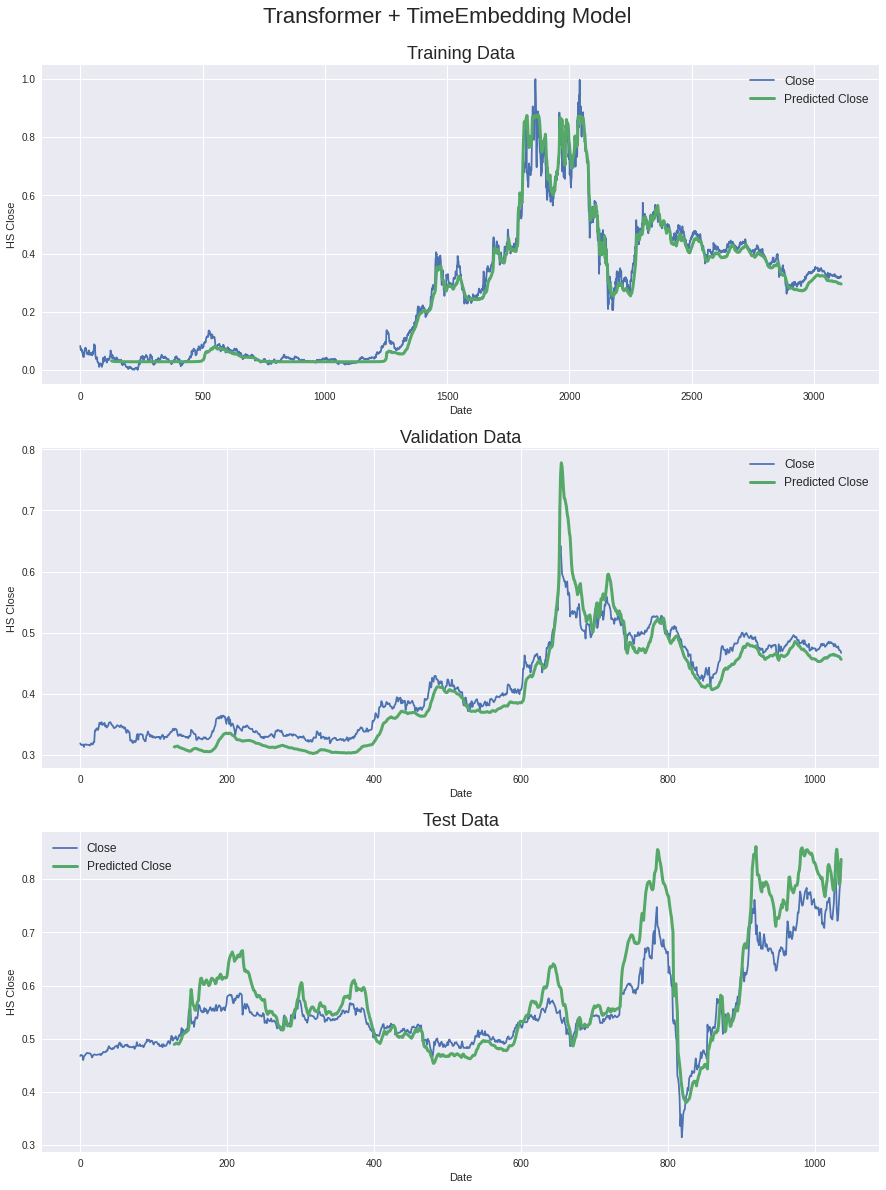

In [ ]:
'''Display results'''

fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Transformer + TimeEmbedding Model", fontsize=22)
st.set_y(0.92)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:, 3], label='Close')
ax11.plot(np.arange(seq_len, train_pred.shape[0]+seq_len), train_pred, linewidth=3, label='Predicted Close')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('HS Close')
ax11.legend(loc="best", fontsize=12)

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(valid_data[:, 3], label='Close')
ax21.plot(np.arange(seq_len, valid_pred.shape[0]+seq_len), valid_pred, linewidth=3, label='Predicted Close')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('HS Close')
ax21.legend(loc="best", fontsize=12)

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:, 3], label='Close')
ax31.plot(np.arange(seq_len, test_pred.shape[0]+seq_len), test_pred, linewidth=3, label='Predicted Close')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('HS Close')
ax31.legend(loc="best", fontsize=12)

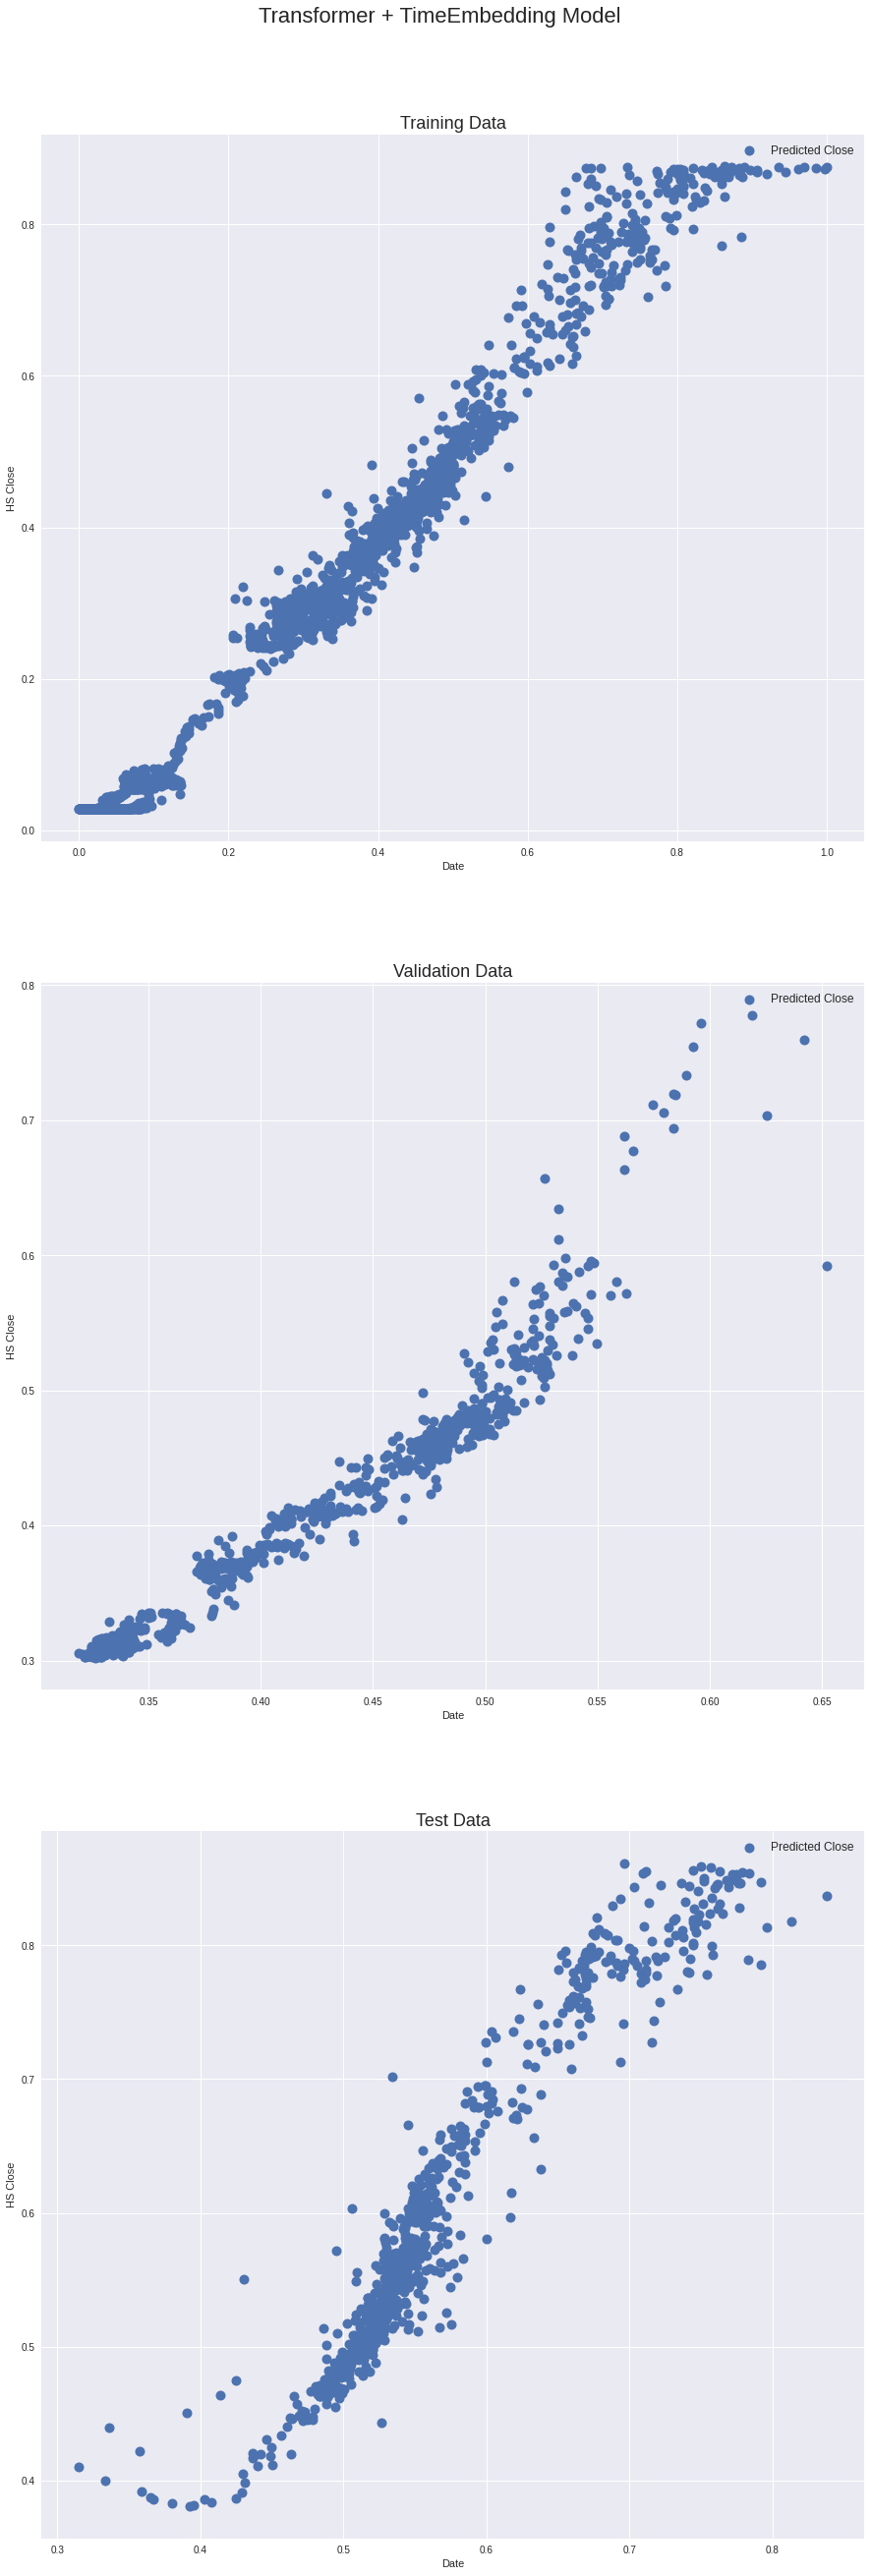

In [ ]:
# 원래값과 예측 값이 일치하면 직선에 가깝게 분포가 된다

%matplotlib inline
import matplotlib.pyplot as plt

'''Display results'''

fig = plt.figure(figsize=(15,45))
st = fig.suptitle("Transformer + TimeEmbedding Model", fontsize=22)
st.set_y(0.92)

#Plot training data results
ax11 = fig.add_subplot(311)
plt.scatter(np.asarray(y_train), train_pred, linewidth=3, label='Predicted Close')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('HS Close')
ax11.legend(loc="best", fontsize=12)

#Plot validation data results
ax21 = fig.add_subplot(312)
plt.scatter(np.asarray(y_valid), valid_pred, linewidth=3, label='Predicted Close')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('HS Close')
ax21.legend(loc="best", fontsize=12)

#Plot test data results
ax31 = fig.add_subplot(313)
plt.scatter(np.asarray(y_test), test_pred, linewidth=3, label='Predicted Close')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('HS Close')
ax31.legend(loc="best", fontsize=12)

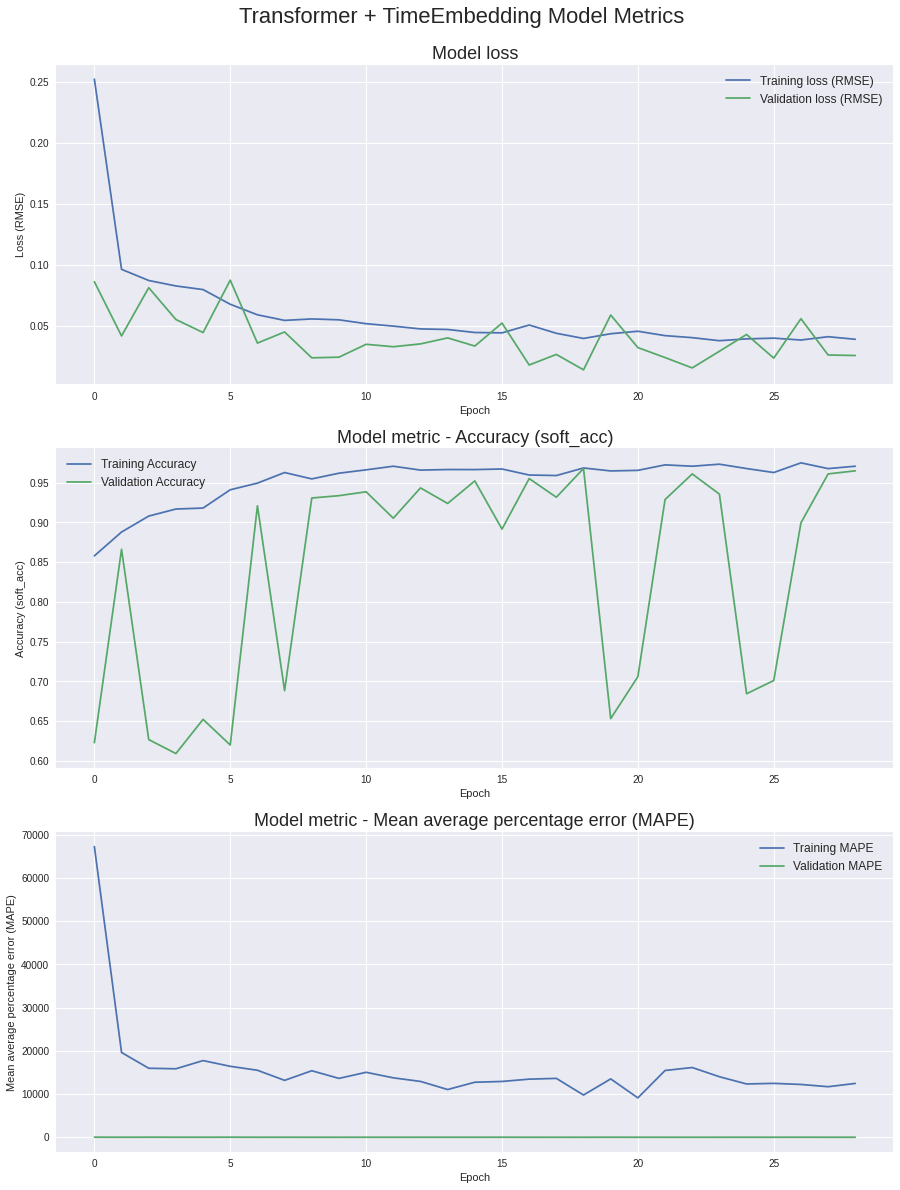

In [ ]:
'''Display model metrics'''

fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Transformer + TimeEmbedding Model Metrics", fontsize=22)
st.set_y(0.92)

#Plot Model Loss
ax1 = fig.add_subplot(311)
ax1.plot(history.history['loss'], label='Training loss (RMSE)')
ax1.plot(history.history['val_loss'], label='Validation loss (RMSE)')
ax1.set_title("Model loss", fontsize=18)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss (RMSE)')
ax1.legend(loc="best", fontsize=12)

#Plot Model Acurracy
ax2 = fig.add_subplot(312)
ax2.plot(history.history['soft_acc'], label='Training Accuracy')
ax2.plot(history.history['val_soft_acc'], label='Validation Accuracy')
ax2.set_title("Model metric - Accuracy (soft_acc)", fontsize=18)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (soft_acc)')
ax2.legend(loc="best", fontsize=12)

#Plot MAPE
ax3 = fig.add_subplot(313)
ax3.plot(history.history['mape'], label='Training MAPE')
ax3.plot(history.history['val_mape'], label='Validation MAPE')
ax3.set_title("Model metric - Mean average percentage error (MAPE)", fontsize=18)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Mean average percentage error (MAPE)')
ax3.legend(loc="best", fontsize=12)

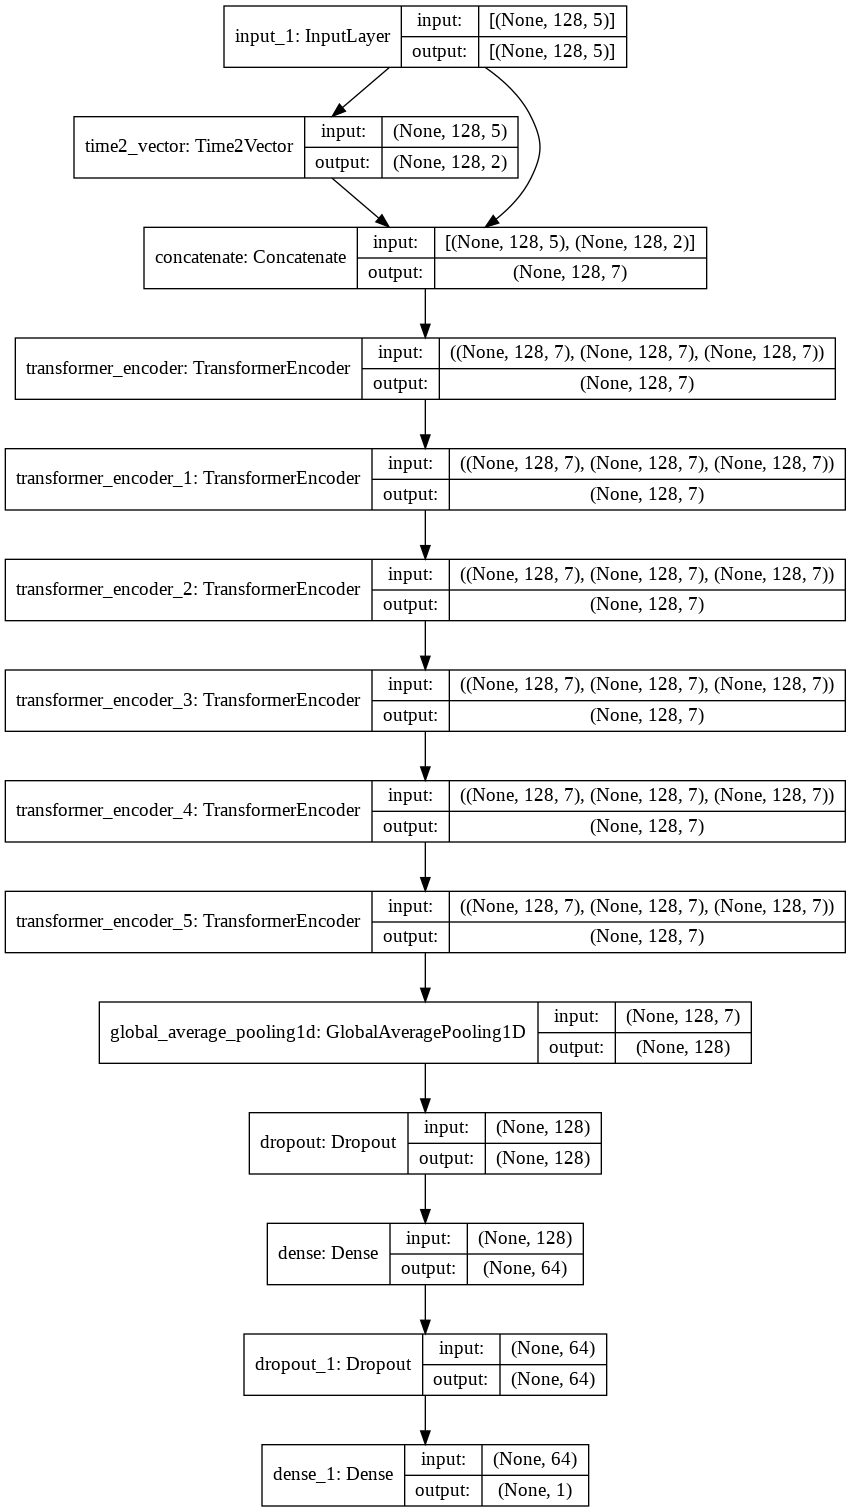

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="HS_Transformer+TimeEmbedding.png",
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96,)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 5)]     0                                            
__________________________________________________________________________________________________
time2_vector (Time2Vector)      (None, 128, 2)       512         input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 128, 7)       0           input_1[0][0]                    
                                                                 time2_vector[0][0]               
__________________________________________________________________________________________________
transformer_encoder (Transforme (None, 128, 7)       46634       concatenate[0][0]            

In [ ]:
import numpy as np


print('R2_Score')
print('-' * 40)
print('train error: {} |\nvalid error: {} |\ntest error : {}\n'.format(train_evaluate[9], valid_evaluate[9], test_evaluate[9]))

print('Mean Squared Error')
print('-' * 40)
print('train error: {} |\nvalid error: {} |\ntest error : {}\n'.format(train_evaluate[2], valid_evaluate[2], test_evaluate[2]))

print('Mean Absolute Error')
print('-' * 40)
print('train error: {} |\nvalid error: {} |\ntest error : {}\n'.format(train_evaluate[3], valid_evaluate[3], test_evaluate[3]))

print('Root Mean Squared Error')
print('-' * 40)
print('train error: {} |\nvalid error: {} |\ntest error : {}\n'.format(train_evaluate[4], valid_evaluate[4], test_evaluate[4]))

print('Mean Squared Logarithmic Error')
print('-' * 40)
print('train error: {} |\nvalid error: {} |\ntest error : {}\n'.format(train_evaluate[7], valid_evaluate[7], test_evaluate[7]))

print('Root Mean Squared Logarithmic Error')
print('-' * 40)
print('train error: {} |\nvalid error: {} |\ntest error : {}\n'.format(train_evaluate[8], valid_evaluate[8], test_evaluate[8]))

print('Mean Absolute Percentage Error')
print('-' * 40)
print('train error: {} |\nvalid error: {} |\ntest error : {}\n'.format(train_evaluate[5], valid_evaluate[5], test_evaluate[5]))

print('Mean Percentage Error')
print('-' * 40)
print('train error: {} |\nvalid error: {} |\ntest error : {}\n'.format(train_evaluate[6], valid_evaluate[6], test_evaluate[6]))

R2_Score
----------------------------------------
train error: -5.671384334564209 |
valid error: -8.193309783935547 |
test error : -12.4131441116333

Mean Squared Error
----------------------------------------
train error: 0.0009882785379886627 |
valid error: 0.0007876157760620117 |
test error : 0.0027103270404040813

Mean Absolute Error
----------------------------------------
train error: 0.021635551005601883 |
valid error: 0.02169644460082054 |
test error : 0.038647688925266266

Root Mean Squared Error
----------------------------------------
train error: 0.024816224351525307 |
valid error: 0.02356763370335102 |
test error : 0.04234166815876961

Mean Squared Logarithmic Error
----------------------------------------
train error: 0.0004991969326511025 |
valid error: 0.00035498844226822257 |
test error : 0.00097277807071805

Root Mean Squared Logarithmic Error
----------------------------------------
train error: 0.01635975018143654 |
valid error: 0.015205143019557 |
test error : 0.02

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-4f804473-e3f7-694d-a993-2e570c1e0083)


In [ ]:
!nvidia-smi

Fri Mar 26 12:50:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    28W /  70W |   9024MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz


In [ ]:
#Memory(that we can use)

!free -h --si | awk  '/Mem:/{print $2}'

13G


In [ ]:
#hard disk space that we can use

!df -h / | awk '{print $4}'

Avail
30G


In [ ]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


In [ ]:
import torch
import tensorflow as tf
import keras
import numpy
import matplotlib
import pandas


!pip list | grep scikit-learn
print(matplotlib.__version__)
print(pandas.__version__)
print(numpy.__version__)
print(torch.__version__)
print(tf.__version__)
print(keras.__version__)

scikit-learn                  0.24.1        
3.2.2
1.1.5
1.19.5
1.8.0+cu101
2.4.1
2.4.3


In [ ]:
import sys

print("--sys.version- ")
print(sys.version)

--sys.version- 
3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
